Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey

For this project, you'll clean and explore the dataset in Jupyter notebook



The data has several columns, including the following:

RespondentID — An anonymized ID for the respondent (person taking the survey)

Gender — the respondent's gender

Age — the respondent's age

Household Income — the respondent's income

Education — the respondent's education level

Location (Census Region) — the respondent's location

Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response

Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No responds

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.



In [51]:
#Read the data into a pandas DataFrame

import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')


In [52]:
#explore the data

star_wars.head(10)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [53]:
#Review the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

CLEANING AND MAPPING YES/NO COLUMNS

Both columns are currently string types, because the main values they contain are Yes and No. 
We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values True, False, and NaN. 
Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [54]:
#Convert the Do you consider yourself to be a fan of the Star Wars film franchise? column to the Boolean type
 
series_bool = {'Yes': True,'No': False}
for col in [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
    ]:
    star_wars[col] = star_wars[col].map(series_bool)

Check to see if the changes have taken effect

In [55]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.

Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.

Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.

Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.

Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.

Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive

In [56]:
#Convert each column above so that it only contains the values True and False

In [57]:
import numpy as np

movie_mapping = {
    'Star Wars: Episode I  The Phantom Menace': True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [58]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })



In [59]:
#check the changes
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace

Unnamed: 10 — How much the respondent liked Star Wars: Episode II Attack of the Clones

Unnamed: 11 — How much the respondent liked Star Wars: Episode III Revenge of the Sith

Unnamed: 12 — How much the respondent liked Star Wars: Episode IV A New Hope

Unnamed: 13 — How much the respondent liked Star Wars: Episode V The Empire Strikes Back

Unnamed: 14 — How much the respondent liked Star Wars: Episode VI Return of the Jedi

In [60]:
#Convert each column above to float and give the columns a more descriptive name
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [61]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })


In [62]:
#check the results
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie

In [63]:
star_wars[star_wars.columns[9:15]].mean().sort_values(ascending=False)

ranking_3    4.341317
ranking_2    4.087321
ranking_1    3.732934
ranking_4    3.272727
ranking_6    3.047847
ranking_5    2.513158
dtype: float64

<BarContainer object of 6 artists>

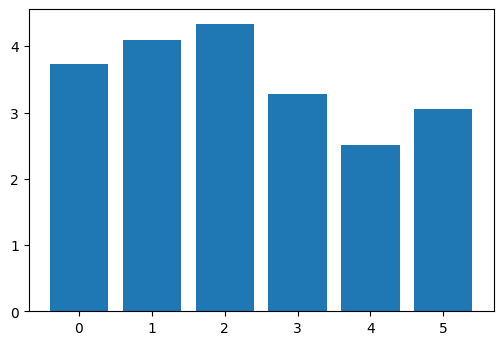

In [64]:
#Make a bar chat of each column
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())



So far we've cleaned the data, renamed several columns, and computed the average ranking of each movie. Since the ranking goes from highest (ie 1) to lowest (ie 6), it seems like the oldest movie (ie Star Wars: Episode V The Empire Strikes Back) is the one ranked higher comparing to the others (column 4, ranking_5). This confirms the hypothesis that the "original" movies are more acclaimed than the newest episodes.

Finding the Most Viewed Movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type.

That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [66]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

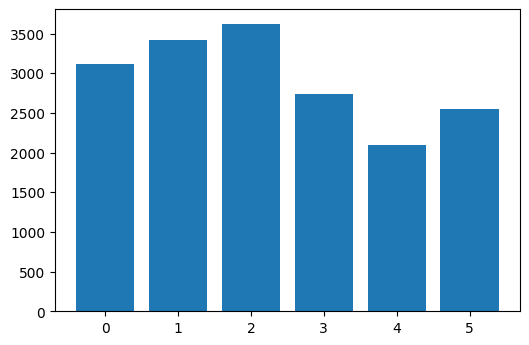

In [67]:
#lets plot a bar chart of each ranking
plt.bar(range(6), star_wars[star_wars.columns[9:15]].sum())

It looks like the most viewed movies are Star Wars: Episode V The Empire Strikes Back and Star Wars: Episode VI Return of the Jedi. This might be because, as shown by the rankings chart, the respondents liked those movies more, so they watched them more times.

Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

Do you consider yourself to be a fan of the Star Wars film franchise? — True or False

Do you consider yourself to be a fan of the Star Trek franchise? — Yes or No
Gender — Male or Female
We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. For example, we can split on the Gender column

The subsets allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

In [68]:
#Split the data into 2 groups based on one of the binary columns above
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [69]:
#Lets repeat the 2 previos analyses
gender_rank = males.iloc[:,9:15].sum()
gender_rank

ranking_1    1708.0
ranking_2    1787.0
ranking_3    1804.0
ranking_4    1268.0
ranking_5    1040.0
ranking_6    1270.0
dtype: float64

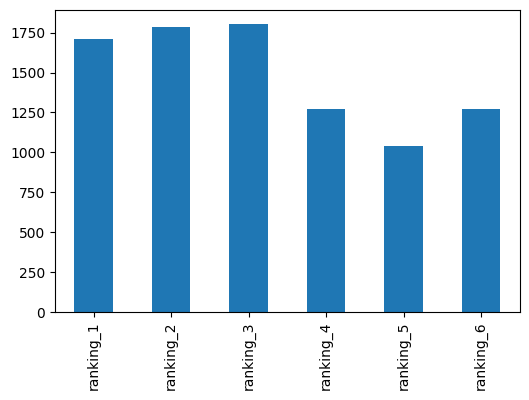

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

gender_rank.plot.bar()

Among Star Wars males, the highest-ranked movie is Star Wars: Episode III Revenge of the Sith (ranking_3). This might be because the storyline of the series have an important emotional connection that males 

In [71]:
female_rank = females.iloc[:,9:15].sum()
female_rank

ranking_1    1358.0
ranking_2    1570.0
ranking_3    1754.0
ranking_4    1407.0
ranking_5    1020.0
ranking_6    1222.0
dtype: float64

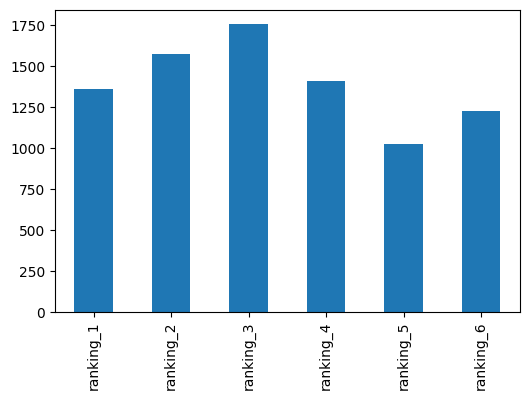

In [72]:
female_rank.plot.bar()

It looks like the most viewed movie among meles is seen_5 and seen_6, as expected. Same thing can be stated for females. females might have watched seen_5 more probably because of its popularity. Interesting is the fact that also seen_1 scores relatively high. Would be interesting to discover why. females might have started watching the first episode, and the jumped straight to the most popular (V).